In [1]:
import xarray as xr

In [3]:
domain = 'SO_JET'
directory = f"/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/{domain}/"
fn = f"*Ld_{domain}.nc"
ds = xr.open_mfdataset(directory + fn, 
                       concat_dim='time_counter', 
                       combine='nested',
                       chunks={'time_counter': 100}) #, )

In [4]:
ds

<xarray.Dataset>
Dimensions:              (time_counter: 4020, y: 216, x: 238, axis_nbounds: 2)
Coordinates:
  * time_counter         (time_counter) object 0061-01-02 00:00:00 ... 0072-0...
    gphit                (y, x) float64 dask.array<chunksize=(216, 238), meta=np.ndarray>
    glamt                (y, x) float64 dask.array<chunksize=(216, 238), meta=np.ndarray>
    time_instant         (time_counter) object dask.array<chunksize=(30,), meta=np.ndarray>
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    Ld                   (time_counter, y, x) float64 dask.array<chunksize=(30, 216, 238), meta=np.ndarray>
    time_counter_bounds  (time_counter, axis_nbounds, y, x) object dask.array<chunksize=(30, 2, 216, 238), meta=np.ndarray>
Attributes:
    name:         NEMO dataset
    description:  Deformation radius                               -> ocean T...

In [5]:
Ld_mean = ds.Ld.mean(dim='time_counter')

In [10]:
Ld_mean = Ld_mean.expand_dims('time_counter')
Ld_mean

<xarray.DataArray 'Ld' (time_counter: 1, y: 511, x: 361)> Size: 1MB
dask.array<getitem, shape=(1, 511, 361), dtype=float64, chunksize=(1, 511, 361), chunktype=numpy.ndarray>
Coordinates:
    nav_lev  float32 4B 0.5058
Dimensions without coordinates: time_counter, y, x

In [6]:
Ld_mean.to_netcdf(directory + f"MINT_1d_00610101_00721230_Ld_{domain}.nc")

In [7]:
ds = xr.open_dataset(directory + f"MINT_1d_00610101_00721230_Ld_{domain}.nc")

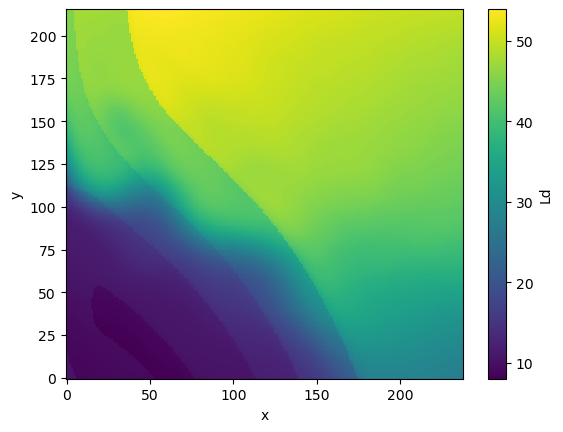

In [8]:
ds.Ld.plot()